# Analysis of COVID-19 Data

So we start off by querying the version of Pandas used. Knowing this is always helpful when it comes to debugging certain problems.

In [9]:
import pandas as pd
print(pd.__version__)
import numpy as np

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 4)

1.0.3


Now we are fetching data from the url provided by "Our World in Data", which you can learn more about by visiting this [link](https://github.com/owid/covid-19-data/tree/master/public/data). 

I thank Edouard Mathieu and his fellow collaborators for this awesome work. They have accumulated the COVID-19 testing rates for every country along with all other relevant information. They are regularly updating the data as well.

In [61]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
print(data.head())

  iso_code location        date  total_cases  new_cases  total_deaths  \
0      ABW    Aruba  2020-03-13            2          2             0   
1      ABW    Aruba  2020-03-20            4          2             0   
2      ABW    Aruba  2020-03-24           12          8             0   
3      ABW    Aruba  2020-03-25           17          5             0   
4      ABW    Aruba  2020-03-26           19          2             0   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0           0                   18.733                 18.733   
1           0                   37.465                 18.733   
2           0                  112.395                 74.930   
3           0                  159.227                 46.831   
4           0                  177.959                 18.733   

   total_deaths_per_million  ...  aged_65_older  aged_70_older  \
0                       0.0  ...         13.085          7.452   
1                       0.0  ...      

In [69]:
bangladesh = data[data["location"] == "Bangladesh"].reset_index().fillna(0)
australia = data[data["location"] == "Australia"].reset_index().fillna(0)
bangladesh = bangladesh[["date", "total_deaths", "total_tests"]]
australia = australia[["date", "total_deaths", "total_tests"]]
print(bangladesh.head())
print(australia.head())

         date  total_deaths  total_tests
0  2020-03-04             0        108.0
1  2020-03-05             0        111.0
2  2020-03-07             0        120.0
3  2020-03-08             0        127.0
4  2020-03-09             0        137.0
         date  total_deaths  total_tests
0  2019-12-31             0          0.0
1  2020-01-01             0          0.0
2  2020-01-02             0          0.0
3  2020-01-03             0          0.0
4  2020-01-04             0          0.0


In [70]:
bangladesh["date"] = pd.to_datetime(bangladesh["date"])
bangladesh["date"] = (bangladesh["date"] - bangladesh["date"][0]).dt.days

australia["date"] = pd.to_datetime(australia["date"])
australia["date"] = (australia["date"] - australia["date"][0]).dt.days

bangladesh = bangladesh.set_index("date")
australia = australia.set_index("date")

print(bangladesh.head())
print(australia.head())

      total_deaths  total_tests
date                           
0                0        108.0
1                0        111.0
3                0        120.0
4                0        127.0
5                0        137.0
      total_deaths  total_tests
date                           
0                0          0.0
1                0          0.0
2                0          0.0
3                0          0.0
4                0          0.0


In [76]:
bangladesh["total_deaths_normalized"] = bangladesh["total_deaths"] / bangladesh["total_tests"]
bangladesh = bangladesh.fillna(0)

australia["total_deaths_normalized"] = australia["total_deaths"] / australia["total_tests"]
australia = australia.fillna(0)

bangladesh = (bangladesh - bangladesh.mean()) / bangladesh.std()
bangladesh = bangladesh.fillna(0)

australia = (australia - australia.mean()) / australia.std()
australia = australia.fillna(0)

In [77]:
print(bangladesh["total_deaths_normalized"])

date
0     0.127042
1     0.127159
3     0.127510
4     0.127784
5     0.128175
        ...   
64   -0.260508
65   -0.246116
66   -0.251102
67   -2.921424
68   -3.120582
Name: total_deaths_normalized, Length: 68, dtype: float64


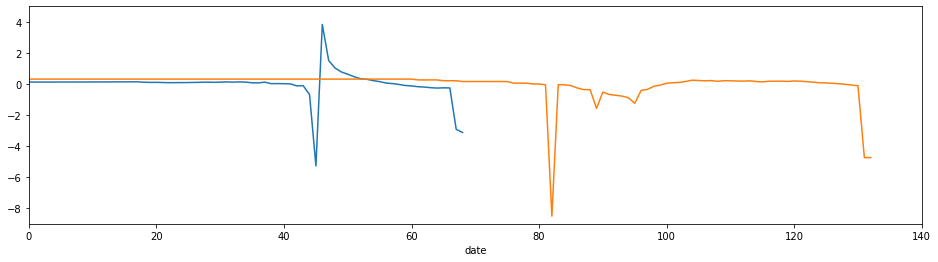

In [82]:
bangladesh["total_deaths_normalized"].plot(xlim = (0, 140), ylim = (-9, 5))
australia["total_deaths_normalized"].plot(xlim = (0, 140), ylim = (-9, 5))